In [1]:
import os

# read data from files train_in.csv and train_out.csv
train_in_list = list()
train_out_list = list()

file = open(os.path.dirname(os.path.abspath("__file__")) + '/datasets/problem1_train_in.csv')
lines = file.readlines()
for line in lines:
    vector = line.split(',')
    clear_vector = []
    for sub in vector:
        clear_vector.append(sub.replace("\n", ""))
    train_in_list.append(clear_vector)
file.close()

file = open(os.path.dirname(os.path.abspath("__file__")) + '/datasets/problem1_train_out.csv')
lines = file.readlines()
for line in lines:
    train_out_list.append(int(line[0]))
file.close()

In [2]:
# build numpy arrays
# input_x (1707,257) => rows: len(training set), columns: input vector 256 + bias (always equal to 1)
# w (10,257) => rows: len(neurons), columns: input vector 256 + bias
# y_actual (1707,10) => rows: len(training set), columns: transformed output (for 10 neurons)
# y_pred (10,1) => columns: predicted output (from 10 neurons)

import numpy as np

bias_array = np.ones(len(train_in_list))
input_x = np.array(train_in_list,dtype='float64')
input_x = np.c_[input_x,bias_array]

w = np.random.rand(10,257).astype('float64')

train_out_transform_list = list()
for number in train_out_list:
    current_list = list()
    for index in range(10):
        if index == number:
            current_list.append(1)
        else:
            current_list.append(0)
    train_out_transform_list.append(current_list)
y_actual = np.array(train_out_transform_list,dtype='float64')

#predictions per round
y_pred = np.zeros(10,dtype='float64')

# avoid weight connection equal to 0
for (x,y), value in np.ndenumerate(w): 
    while w[x,y]==0.0: 
        w[x,y] = np.random.rand()

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def phase_find_ouput(current_idx,current_x,w,y_pred,y_actual):
    for neuron_out in range(10):
        dot_product = np.dot(w[neuron_out],np.transpose(current_x))
        y_pred[neuron_out] = sigmoid(dot_product)

def phase_update_weights(LEARNING_RATE,current_idx,y_pred,current_x,w): 
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i][j] = w[i][j] + LEARNING_RATE*(y_actual[current_idx][i] - y_pred[i])*current_x[j]

def calculate_success(y_actual,current_idx,y_pred):
    global epoch_successcount
    # print('current_idx = {} ------ np.argmax(y_pred) = {}'.format(current_idx,np.argmax(y_pred)))
    if (y_actual[current_idx][np.argmax(y_pred)] == 1.0):
        epoch_successcount += 1

def calculate_error(y_actual,current_idx,y_pred):
    global epoch_error
    current_x_error = 0.0
    for i in range(10):
        current_x_error = current_x_error + (y_actual[current_idx][i] - y_pred[i])**2
    current_x_error = current_x_error / 2
    np.put(epoch_error,current_idx,current_x_error)

In [4]:
from tqdm import tqdm

# constants
NUM_OF_EPOCHS = 20
LEARNING_RATE = 0.2

successrate_list = []       # for all epochs
errorrate_list = []         # for all epochs

for epoch in range(NUM_OF_EPOCHS):

    epoch_successcount = 0                      # per epoch
    epoch_error = np.empty(len(input_x))        # per epoch

    for current_idx, current_x in tqdm(enumerate(input_x)):
        phase_find_ouput(current_idx,current_x,w,y_pred,y_actual)
        phase_update_weights(LEARNING_RATE,current_idx,y_pred,current_x,w)

        calculate_success(y_actual,current_idx,y_pred)
        calculate_error(y_actual,current_idx,y_pred)

    successrate_list.append(epoch_successcount)
    errorrate_list.append(np.mean(epoch_error))
        

for epoch in range(NUM_OF_EPOCHS):
    print('EPOCH: {}'.format(epoch+1))
    print('> epoch_successcount = {} -- (success = {}%)'.format(successrate_list[epoch],successrate_list[epoch]*100/len(input_x)))
    print('> errorrate = {}'.format(errorrate_list[epoch]))
    print('***********************************************************')

1707it [00:05, 339.24it/s]
1707it [00:04, 344.35it/s]
1707it [00:04, 345.84it/s]
1707it [00:04, 345.25it/s]
1707it [00:04, 346.52it/s]
1707it [00:04, 348.59it/s]
1707it [00:04, 347.68it/s]
1707it [00:04, 350.94it/s]
1707it [00:05, 333.49it/s]
1707it [00:05, 331.05it/s]
1707it [00:05, 338.56it/s]
1707it [00:04, 350.31it/s]
1707it [00:04, 344.04it/s]
1707it [00:04, 360.69it/s]
1707it [00:04, 352.26it/s]
1707it [00:04, 349.62it/s]
1707it [00:05, 336.25it/s]
1707it [00:04, 348.06it/s]
1707it [00:04, 363.66it/s]
1707it [00:04, 351.85it/s]

EPOCH: 1
> epoch_successcount = 1397 -- (success = 81.83948447568834%)
> errorrate = 0.20372623882393012
***********************************************************
EPOCH: 2
> epoch_successcount = 1552 -- (success = 90.91974223784418%)
> errorrate = 0.11884100175070657
***********************************************************
EPOCH: 3
> epoch_successcount = 1606 -- (success = 94.08318687756298%)
> errorrate = 0.08732130152197899
***********************************************************
EPOCH: 4
> epoch_successcount = 1617 -- (success = 94.72759226713532%)
> errorrate = 0.07840947445929272
***********************************************************
EPOCH: 5
> epoch_successcount = 1628 -- (success = 95.37199765670768%)
> errorrate = 0.06652424545046065
***********************************************************
EPOCH: 6
> epoch_successcount = 1637 -- (success = 95.89923842999414%)
> errorrate = 0.06353172096966413
***********************************************************
EPOCH: 7
>

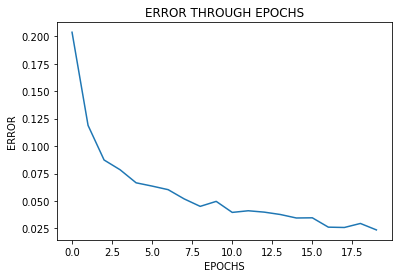

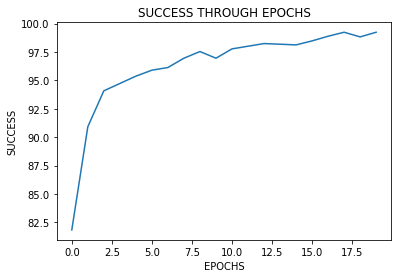

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(NUM_OF_EPOCHS), errorrate_list) 
plt.xlabel("EPOCHS")
plt.ylabel("ERROR")
plt.title("ERROR THROUGH EPOCHS")
plt.show()  

norm_successrate_list = list()
for epoch in range(NUM_OF_EPOCHS):
    norm_successrate_list.append(successrate_list[epoch]*100/len(input_x))
plt.figure()
plt.plot(range(NUM_OF_EPOCHS), norm_successrate_list)
plt.xlabel("EPOCHS")
plt.ylabel("SUCCESS")
plt.title("SUCCESS THROUGH EPOCHS")
plt.show()  

In [6]:
# TESTING PHASE

In [12]:
# read data from files test_in.csv and test_out.csv
test_in_list = list()
test_out_list = list()

file = open(os.path.dirname(os.path.abspath("__file__")) + '/datasets/problem1_test_in.csv')
lines = file.readlines()
for line in lines:
    vector = line.split(',')
    clear_vector = []
    for sub in vector:
        clear_vector.append(sub.replace("\n", ""))
    test_in_list.append(clear_vector)
file.close()

file = open(os.path.dirname(os.path.abspath("__file__")) + '/datasets/problem1_test_out.csv')
lines = file.readlines()
for line in lines:
    test_out_list.append(int(line[0]))
file.close()

In [13]:
# build numpy arrays
# input_x (1000,257) => rows: len(testing set), columns: input vector 256 + bias (always equal to 1)
# **SAME AS ABOVE -  DID NOT CHANGE**w (10,257) => rows: len(neurons), columns: input vector 256 + bias
# y_actual (1000,10) => rows: len(testing set), columns: transformed output (for 10 neurons)
# y_pred (10,1) => columns: predicted output (from 10 neurons)

import numpy as np

bias_array = np.ones(len(test_in_list))
input_x = np.array(test_in_list,dtype='float64')
input_x = np.c_[input_x,bias_array]

test_out_transform_list = list()
for number in test_out_list:
    current_list = list()
    for index in range(10):
        if index == number:
            current_list.append(1)
        else:
            current_list.append(0)
    test_out_transform_list.append(current_list)
y_actual = np.array(test_out_transform_list,dtype='float64')

#predictions per round
y_pred = np.zeros(10,dtype='float64')

In [14]:
from tqdm import tqdm

successrate_list = []       # for all epochs
errorrate_list = []         # for all epochs


epoch_successcount = 0                      # per epoch
epoch_error = np.empty(len(input_x))        # per epoch

for current_idx, current_x in tqdm(enumerate(input_x)):
    phase_find_ouput(current_idx,current_x,w,y_pred,y_actual)

    calculate_success(y_actual,current_idx,y_pred)
    calculate_error(y_actual,current_idx,y_pred)

successrate_list.append(epoch_successcount)
errorrate_list.append(np.mean(epoch_error))
        

print('TESTING PHASE')
print('> epoch_successcount = {} -- (success = {}%)'.format(successrate_list[0],successrate_list[0]*100/len(input_x)))
print('> errorrate = {}'.format(errorrate_list[0]))
print('***********************************************************')

1000it [00:00, 14880.49it/s]

TESTING PHASE
> epoch_successcount = 868 -- (success = 86.8%)
> errorrate = 0.15296448814829872
***********************************************************
